# Brazilian houses to rent

### Dataset houses to rent in diferents cities in Brazil

This dataset contains 10962 houses to rent with 13 different features.

**Outliers**

Could be some values in dataset that can be consider outlier to analysis. Bearing in mind that a Web Crawler only to get the data, it´s possible find some errors like registration error

**Changes in data between versions of dataset**

Since the o WebCrawler was ran in different days to each version of dataset, there may be differences like adding or deleting houses (in addition to the cities added)

[**Kaggle link**](https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent?datasetId=554905&sortBy=voteCount)

# Data exploration

In [109]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("data/houses_to_rent.csv", index_col=0)


In [110]:
data.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
5,1,13,1,1,0,2,acept,not furnished,R$0,"R$2,200",R$42,R$28,"R$2,270"
6,1,55,1,1,1,2,acept,furnished,"R$1,950","R$5,000",R$375,R$64,"R$7,389"
7,1,55,2,2,1,2,acept,not furnished,R$600,"R$1,300",R$67,R$17,"R$1,984"
8,1,82,3,1,1,3,acept,furnished,R$828,"R$2,000",R$109,R$26,"R$2,963"
9,1,32,1,1,1,16,acept,not furnished,R$533,"R$2,900",R$0,R$37,"R$3,470"


In [111]:
data.describe()

,city,area,rooms,bathroom,parking spaces
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,0.863322,151.143914,2.492599,2.341612,1.756250
std,0.343535,375.559485,1.129665,1.438860,1.611909
min,0.000000,10.000000,1.000000,1.000000,0.000000
25%,1.000000,58.000000,2.000000,1.000000,1.000000
50%,1.000000,100.000000,3.000000,2.000000,1.000000
75%,1.000000,200.000000,3.000000,3.000000,2.000000
max,1.000000,24606.000000,10.000000,10.000000,12.000000


In [112]:
data.describe(include="object")

,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
count,6080,6080,6080,6080,6080,6080,6080,6080
unique,37,2,2,1292,1032,1036,190,4069
top,-,acept,not furnished,R$0,"R$15,000",R$0,R$23,"R$2,555"
freq,1555,4666,4498,1291,155,1053,163,35


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            6080 non-null   int64 
 1   area            6080 non-null   int64 
 2   rooms           6080 non-null   int64 
 3   bathroom        6080 non-null   int64 
 4   parking spaces  6080 non-null   int64 
 5   floor           6080 non-null   object
 6   animal          6080 non-null   object
 7   furniture       6080 non-null   object
 8   hoa             6080 non-null   object
 9   rent amount     6080 non-null   object
 10  property tax    6080 non-null   object
 11  fire insurance  6080 non-null   object
 12  total           6080 non-null   object
dtypes: int64(5), object(8)
memory usage: 665.0+ KB


# Data preparation

From the above we can clearly that we don't have any missing value, but we what we do have have is not properly imputed values in columns. First thing we will do is to replace '-' with 0 in column with name floor.

In [114]:
data.replace("-", value=0, inplace=True)
data['floor'] = data['floor'].astype(np.int64)
data.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,0,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
5,1,13,1,1,0,2,acept,not furnished,R$0,"R$2,200",R$42,R$28,"R$2,270"
6,1,55,1,1,1,2,acept,furnished,"R$1,950","R$5,000",R$375,R$64,"R$7,389"
7,1,55,2,2,1,2,acept,not furnished,R$600,"R$1,300",R$67,R$17,"R$1,984"
8,1,82,3,1,1,3,acept,furnished,R$828,"R$2,000",R$109,R$26,"R$2,963"
9,1,32,1,1,1,16,acept,not furnished,R$533,"R$2,900",R$0,R$37,"R$3,470"


Another thing is columns with R$ which clearly indicate price of something, but are treated as cat. values. So we should perform some kind of clearing to make them numeric 

Oops
While running the operation discussed above the problem occurred, researching it I drove a conclusion - there is a string "Stem info" that prevented us from doing the operation we were intended to, so we have to replace with something.

Upd: the "Incluso" string gives the same problem and needs to be imputed with zero as well. 


In [115]:
data.isin(["Sem info"]).any()

city              False
area              False
rooms             False
bathroom          False
parking spaces    False
floor             False
animal            False
furniture         False
hoa                True
rent amount       False
property tax      False
fire insurance    False
total             False
dtype: bool

In [116]:
data.isin(["Incluso"]).any()

city              False
area              False
rooms             False
bathroom          False
parking spaces    False
floor             False
animal            False
furniture         False
hoa                True
rent amount       False
property tax       True
fire insurance    False
total             False
dtype: bool

In [117]:
data["hoa"].replace("Sem info", 0, inplace=True)
data["hoa"].replace("Incluso", 0, inplace=True)
data["property tax"].replace("Incluso", 0, inplace=True)

And now repeat the operation

In [118]:
data.iloc[:, -5:] = data.iloc[:, -5:].replace(r"R\$", "",regex=True).replace(r"\,", "", regex=True).astype(np.int64)
data.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,acept,furnished,0,8000,1000,121,9121
1,0,64,2,1,1,10,acept,not furnished,540,820,122,11,1493
2,1,443,5,5,4,3,acept,furnished,4172,7000,1417,89,12680
3,1,73,2,2,1,12,acept,not furnished,700,1250,150,16,2116
4,1,19,1,1,0,0,not acept,not furnished,0,1200,41,16,1257
5,1,13,1,1,0,2,acept,not furnished,0,2200,42,28,2270
6,1,55,1,1,1,2,acept,furnished,1950,5000,375,64,7389
7,1,55,2,2,1,2,acept,not furnished,600,1300,67,17,1984
8,1,82,3,1,1,3,acept,furnished,828,2000,109,26,2963
9,1,32,1,1,1,16,acept,not furnished,533,2900,0,37,3470


# Categorical

In [119]:
cat_cols = [col for col in data.columns if data[col].dtype=="object"]
cat_cols

['animal', 'furniture']

In [120]:
[len(data[col].unique()) for col in cat_cols]

[2, 2]

We will use sklearn's ordinary encoding, because every column consists of only 2 unique values

In [121]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data[cat_cols] = encoder.fit_transform(data[cat_cols])
data[cat_cols] = data[cat_cols].applymap(lambda x: int(not bool(x)))
data.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,1,1,0,8000,1000,121,9121
1,0,64,2,1,1,10,1,0,540,820,122,11,1493
2,1,443,5,5,4,3,1,1,4172,7000,1417,89,12680
3,1,73,2,2,1,12,1,0,700,1250,150,16,2116
4,1,19,1,1,0,0,0,0,0,1200,41,16,1257
5,1,13,1,1,0,2,1,0,0,2200,42,28,2270
6,1,55,1,1,1,2,1,1,1950,5000,375,64,7389
7,1,55,2,2,1,2,1,0,600,1300,67,17,1984
8,1,82,3,1,1,3,1,1,828,2000,109,26,2963
9,1,32,1,1,1,16,1,0,533,2900,0,37,3470


I have inverted values to make them more logical, though I think the model wouldn't even consider this at any kind

# Numerical

First of all we will try to make our data more normally distributed

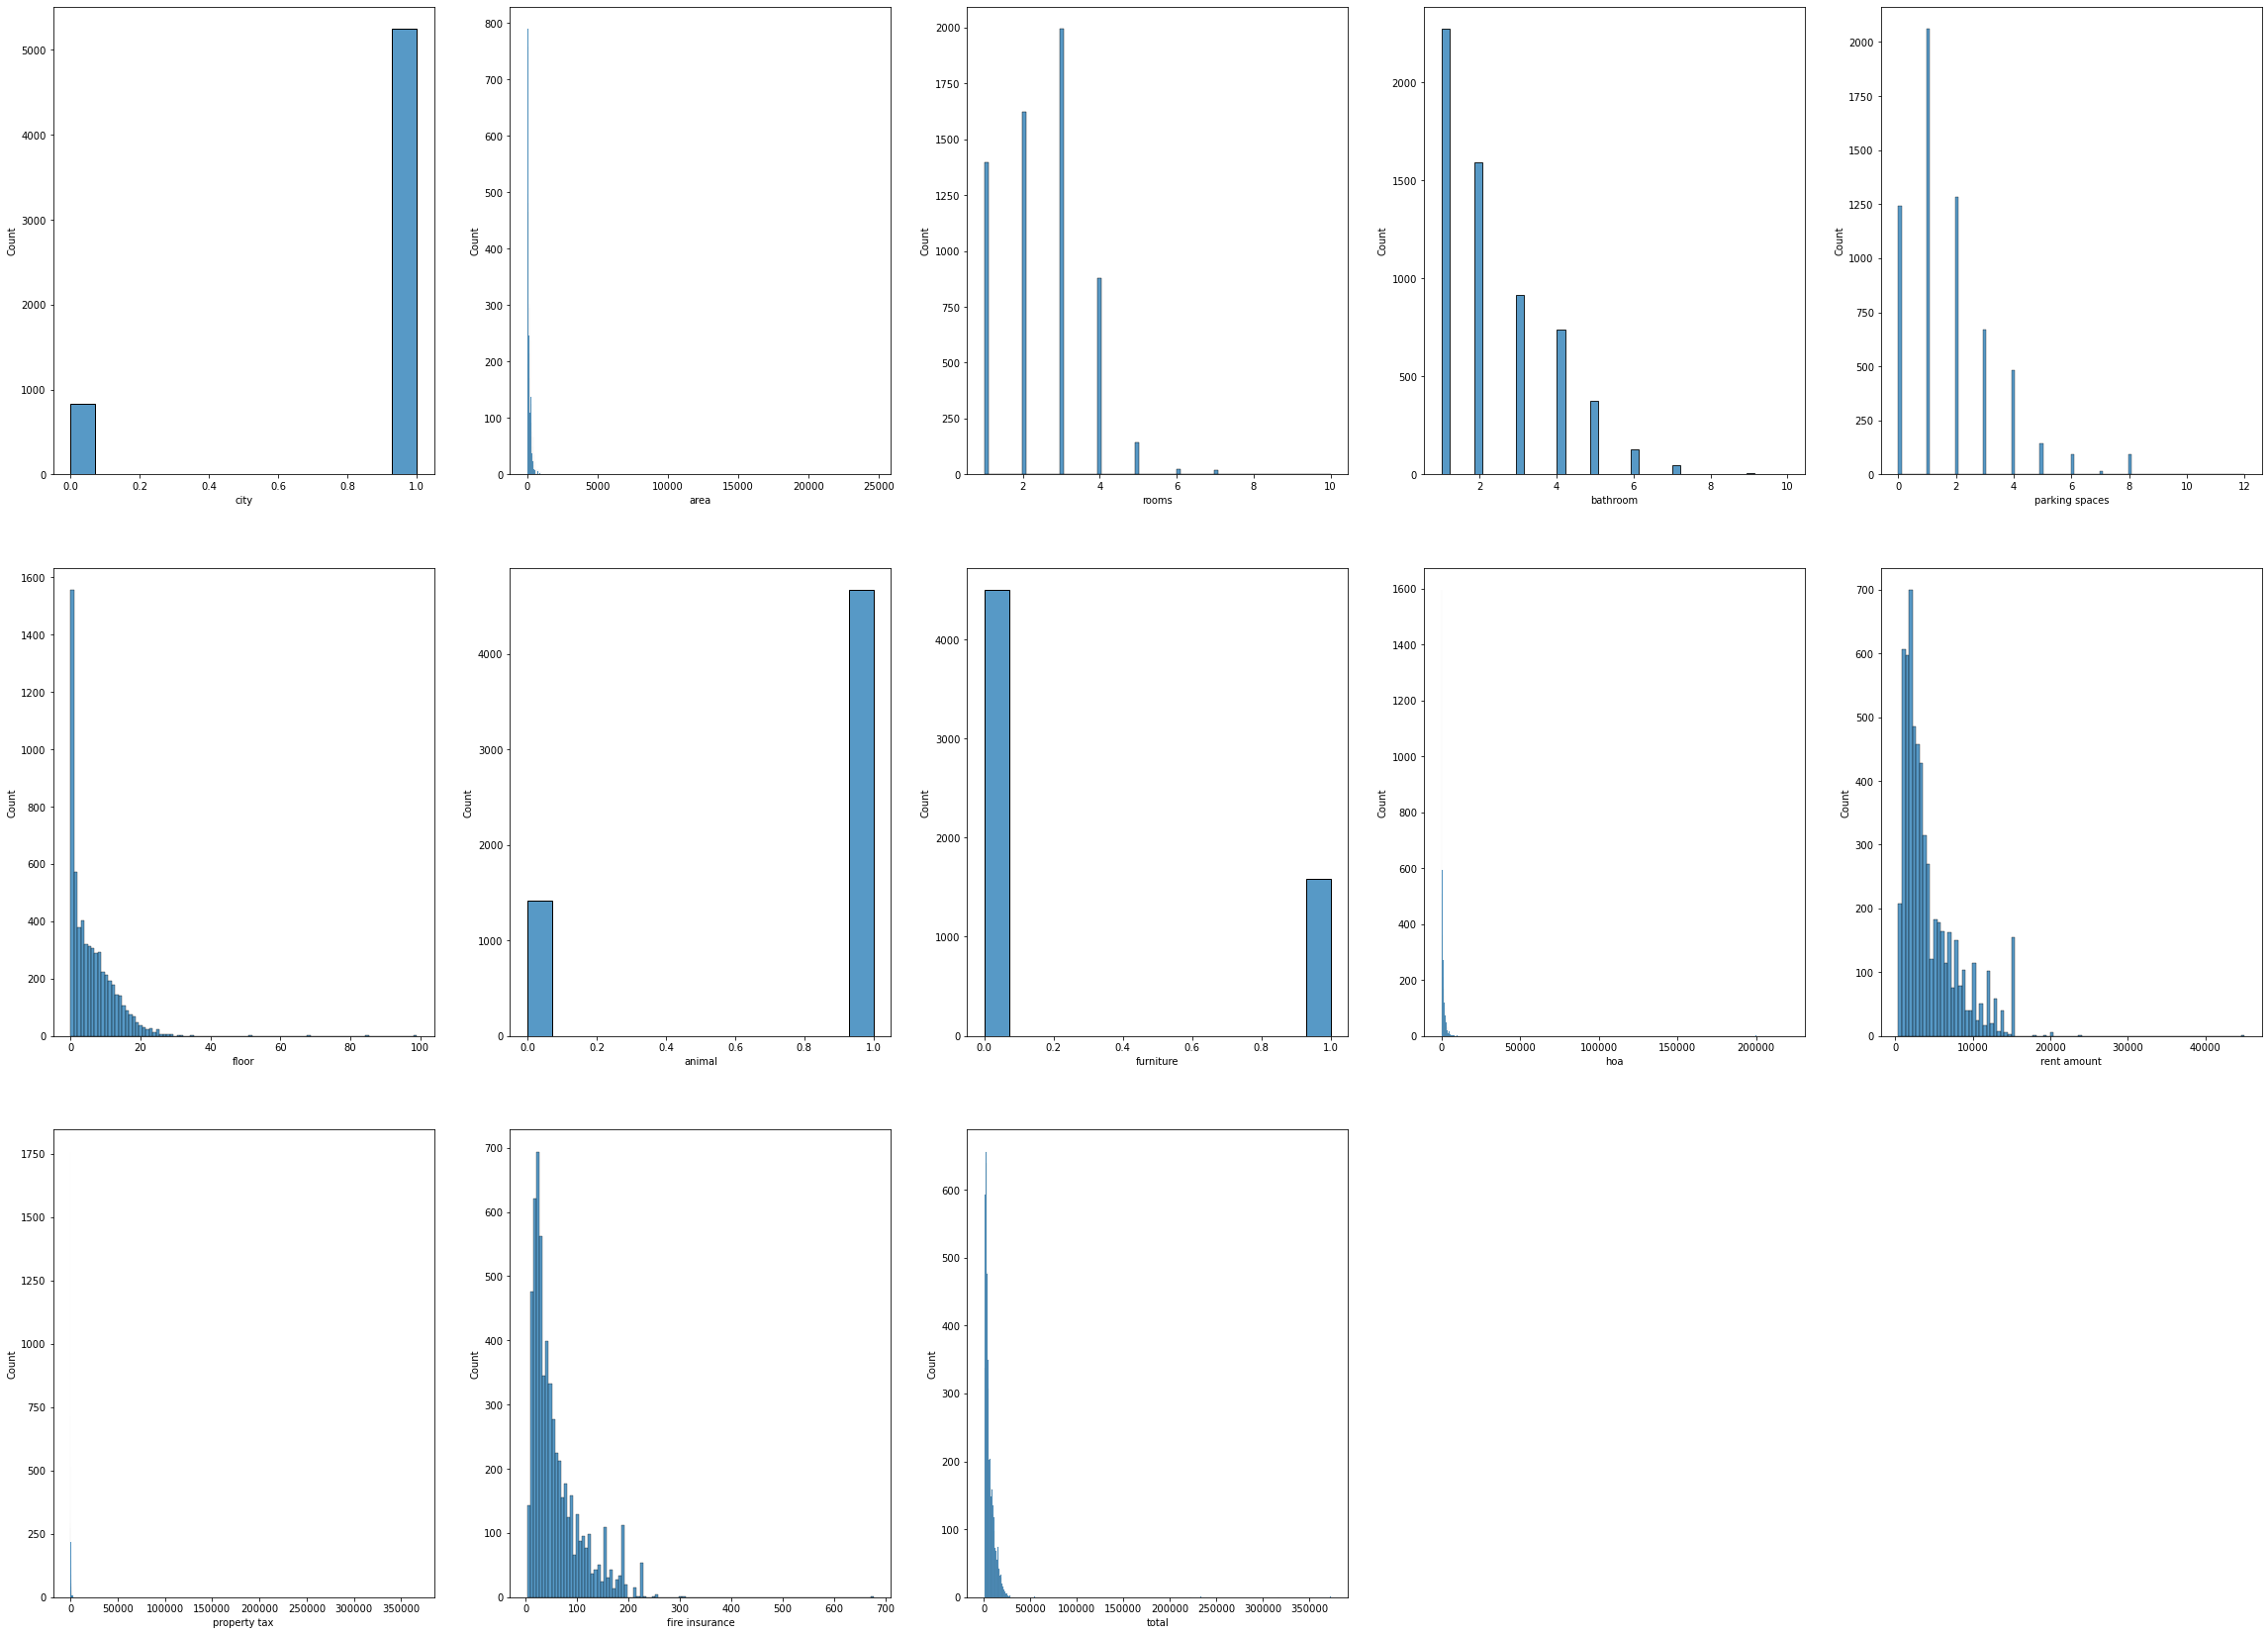

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40,40))
for i, col in enumerate (data.columns,1):
    plt.subplot(4,5,i)
    sns.histplot(data=data[col])



Most of the data seems skewed, so I am going to use np.log transform to make it more normally distributed. This applies to columns:
area, floor, hoa, rent amount, property tax, fire insurance, total, bathroom, rooms, parking spaces

In [123]:
log_transform_cols = ['area', 'floor', 'rent amount', 'property tax', 'fire insurance', 'total', 'hoa', 'bathroom', 'rooms', 'parking spaces']
log_transform_cols

['area',
 'floor',
 'rent amount',
 'property tax',
 'fire insurance',
 'total',
 'hoa',
 'bathroom',
 'rooms',
 'parking spaces']

In [124]:
for col in log_transform_cols:
    data[col] = np.log(data[col])
data.replace([np.inf, -np.inf], 0, inplace=True)
data.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,5.480639,1.098612,1.098612,1.386294,0.000000,1,1,0.000000,8.987197,6.907755,4.795791,9.118335
1,0,4.158883,0.693147,0.000000,0.000000,2.302585,1,0,6.291569,6.709304,4.804021,2.397895,7.308543
2,1,6.093570,1.609438,1.609438,1.386294,1.098612,1,1,8.336151,8.853665,7.256297,4.488636,9.447781
3,1,4.290459,0.693147,0.693147,0.000000,2.484907,1,0,6.551080,7.130899,5.010635,2.772589,7.657283
4,1,2.944439,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,7.090077,3.713572,2.772589,7.136483
5,1,2.564949,0.000000,0.000000,0.000000,0.693147,1,0,0.000000,7.696213,3.737670,3.332205,7.727535
6,1,4.007333,0.000000,0.000000,0.000000,0.693147,1,1,7.575585,8.517193,5.926926,4.158883,8.907748
7,1,4.007333,0.693147,0.693147,0.000000,0.693147,1,0,6.396930,7.170120,4.204693,2.833213,7.592870
8,1,4.406719,1.098612,0.000000,0.000000,1.098612,1,1,6.719013,7.600902,4.691348,3.258097,7.993958
9,1,3.465736,0.000000,0.000000,0.000000,2.772589,1,0,6.278521,7.972466,0.000000,3.610918,8.151910


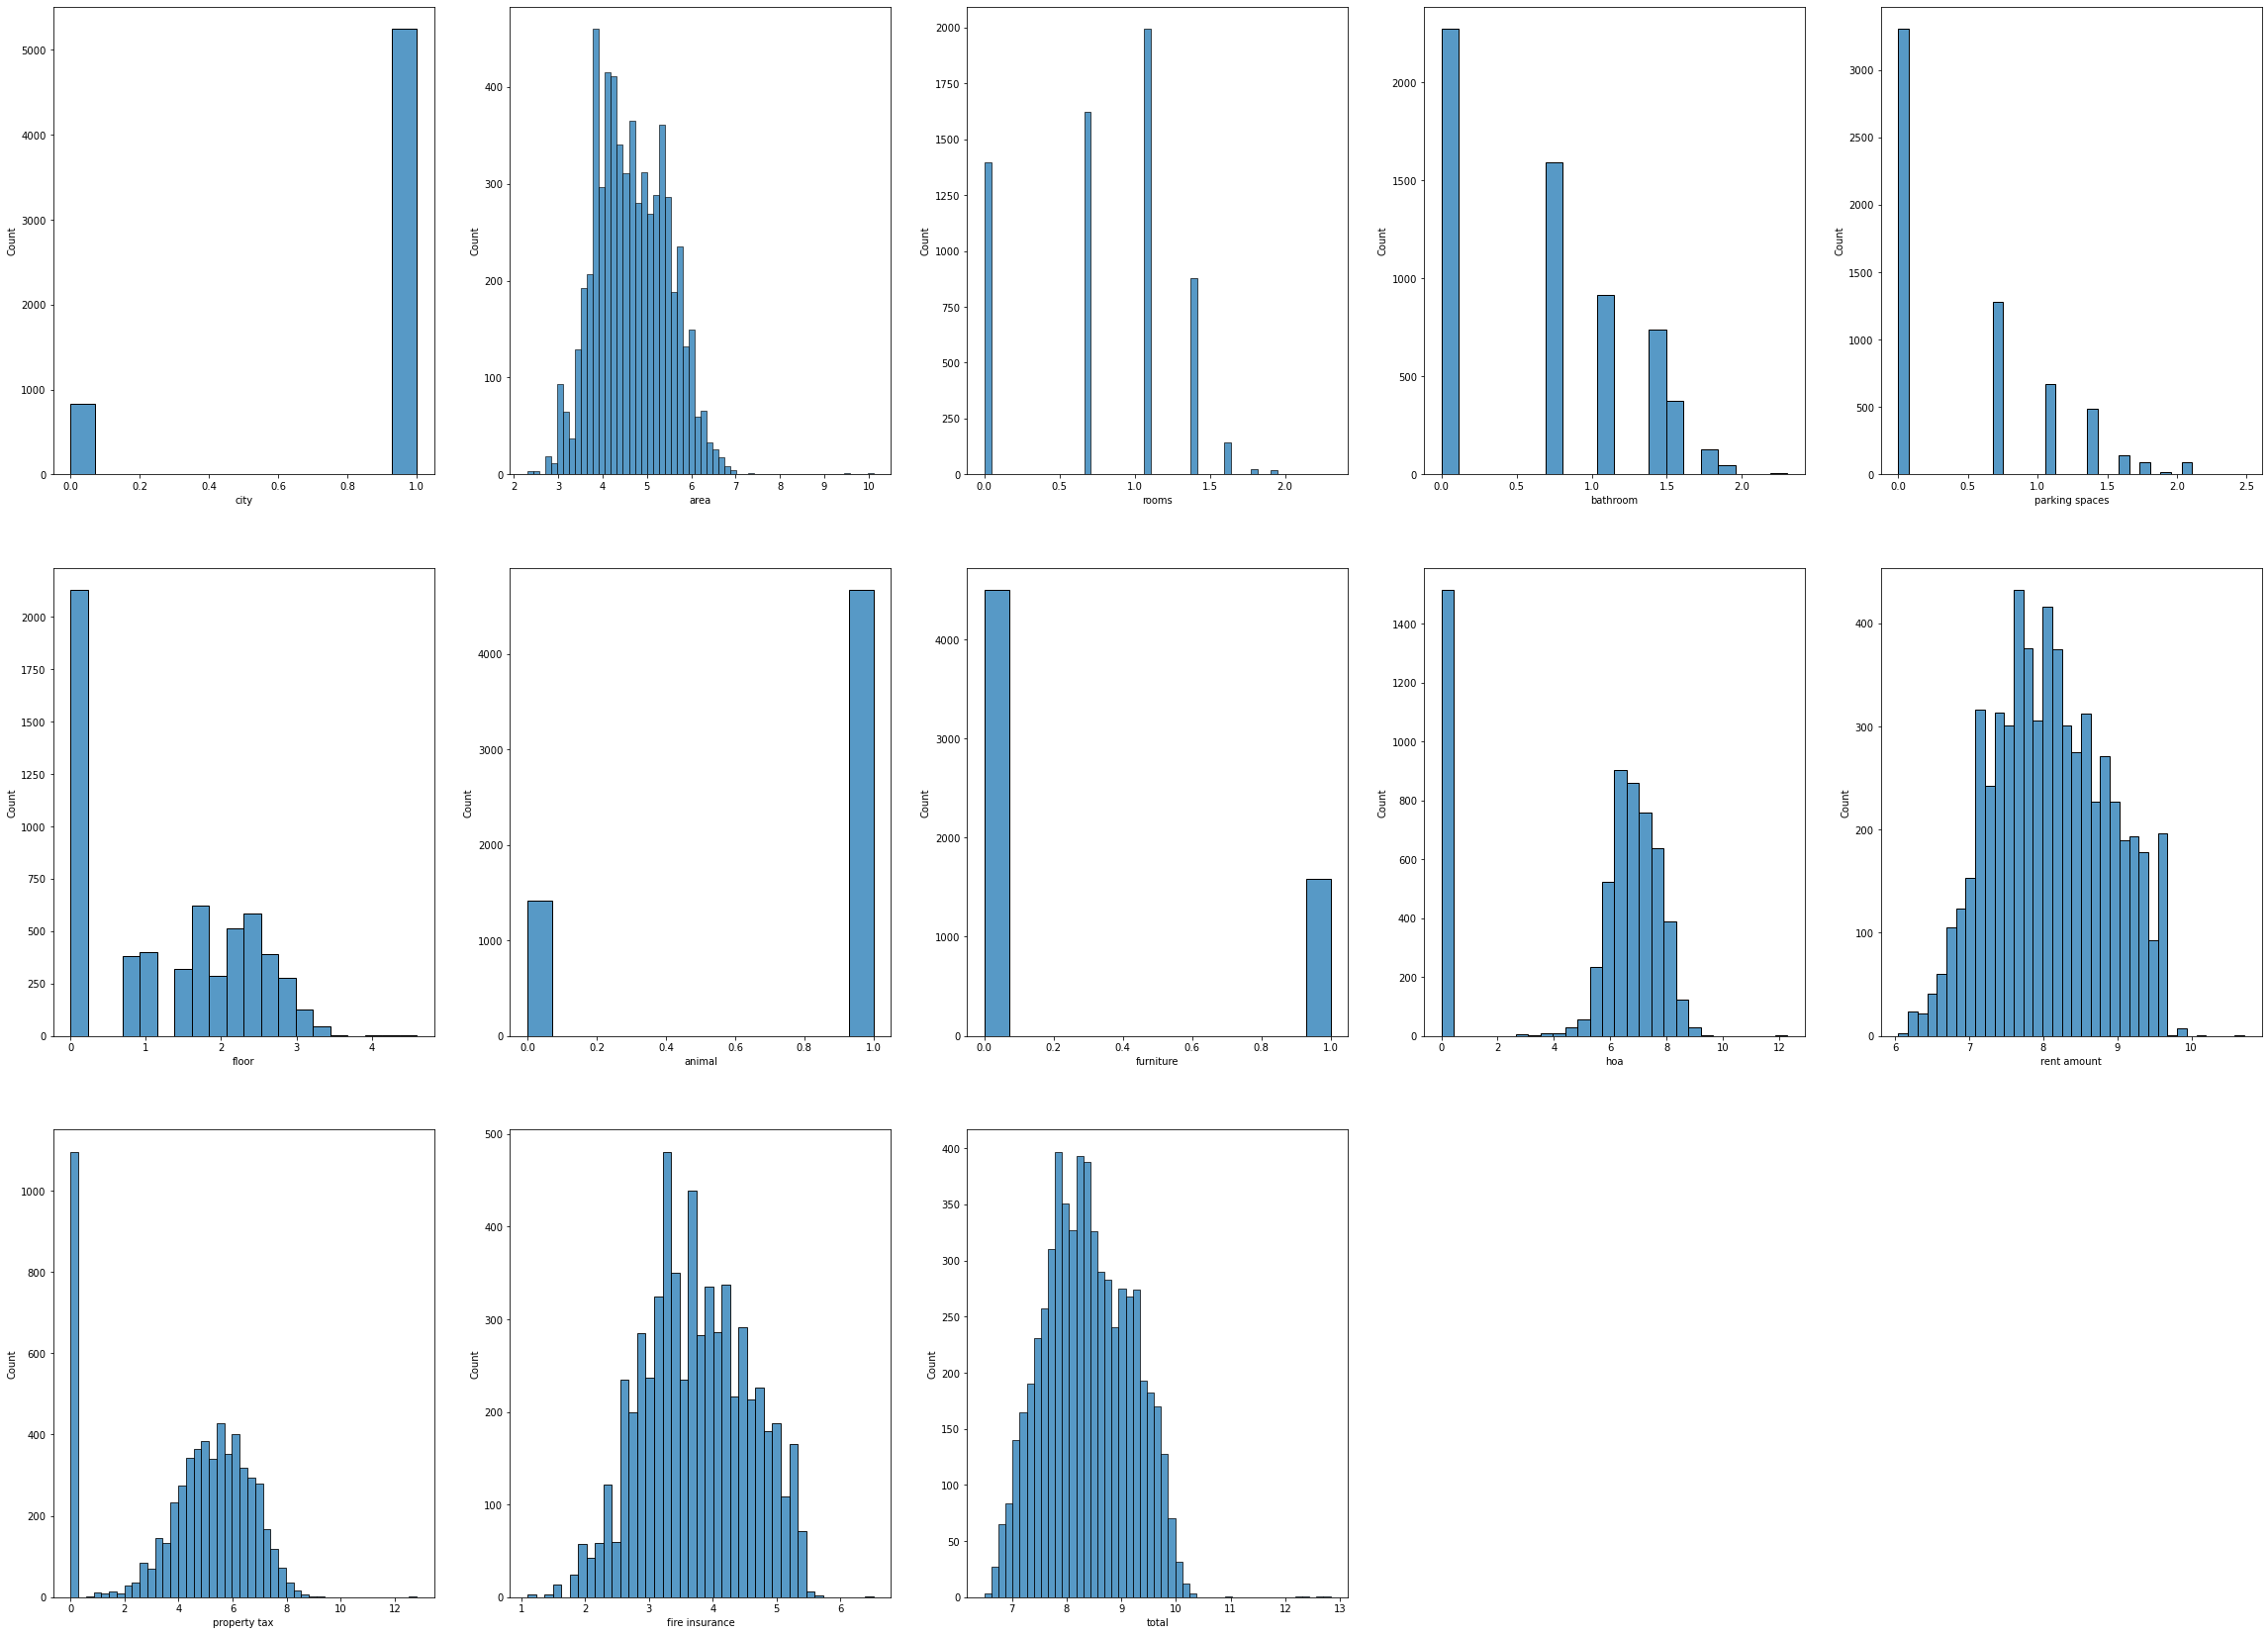

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40,40))
for i, col in enumerate (data.columns,1):
    plt.subplot(4,5,i)
    sns.histplot(data=data[col])

And at last we will use scaling to give our data more comprehensible shape for the model. For this we will use MinMaxScaler from sklearn preprocessing folder

In [126]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
data.iloc[:, 1:] = pd.DataFrame(minmax.fit_transform(data.iloc[:,1:]), index=data.index, columns=data.columns[1:])
data.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,0.407017,0.477121,0.477121,0.557886,0.000000,1.0,1.0,0.000000,0.630475,0.539196,0.682255,0.414453
1,0,0.237738,0.301030,0.000000,0.000000,0.501094,1.0,0.0,0.511452,0.143138,0.374986,0.239762,0.128830
2,1,0.485516,0.698970,0.698970,0.557886,0.239082,1.0,1.0,0.677660,0.601907,0.566402,0.625574,0.466447
3,1,0.254589,0.301030,0.301030,0.000000,0.540771,1.0,0.0,0.532548,0.233335,0.391113,0.308905,0.183868
4,1,0.082203,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.224601,0.289869,0.308905,0.101675
5,1,0.033601,0.000000,0.000000,0.000000,0.150844,1.0,0.0,0.000000,0.354279,0.291750,0.412173,0.194956
6,1,0.218329,0.000000,0.000000,0.000000,0.150844,1.0,1.0,0.615832,0.529921,0.462636,0.564724,0.381218
7,1,0.218329,0.301030,0.301030,0.000000,0.150844,1.0,0.0,0.520017,0.241726,0.328204,0.320093,0.173703
8,1,0.269479,0.477121,0.000000,0.000000,0.239082,1.0,1.0,0.546200,0.333888,0.366191,0.398498,0.237003
9,1,0.148966,0.000000,0.000000,0.000000,0.603377,1.0,0.0,0.510392,0.413381,0.000000,0.463606,0.261931


# Modeling

We will use various classification models, but first of all we need to create a cross validation function

In [127]:
from sklearn.model_selection import cross_val_score

def score(model, X,y):
    return np.mean(cross_val_score(model, X,y,cv=5, scoring='f1'))



Okay now let's split the dataset to X and y

In [128]:
X = data.drop(['city'],axis=1)
y = data.pop('city')

In [129]:
X

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0.407017,0.477121,0.477121,0.557886,0.000000,1.0,1.0,0.000000,0.630475,0.539196,0.682255,0.414453
1,0.237738,0.301030,0.000000,0.000000,0.501094,1.0,0.0,0.511452,0.143138,0.374986,0.239762,0.128830
2,0.485516,0.698970,0.698970,0.557886,0.239082,1.0,1.0,0.677660,0.601907,0.566402,0.625574,0.466447
3,0.254589,0.301030,0.301030,0.000000,0.540771,1.0,0.0,0.532548,0.233335,0.391113,0.308905,0.183868
4,0.082203,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.224601,0.289869,0.308905,0.101675
...,...,...,...,...,...,...,...,...,...,...,...,...
6075,0.206123,0.301030,0.000000,0.000000,0.150844,1.0,0.0,0.491022,0.215496,0.000000,0.296996,0.138267
6076,0.272565,0.301030,0.301030,0.000000,0.603377,0.0,1.0,0.540085,0.413381,0.323399,0.463606,0.274934
6077,0.200894,0.000000,0.000000,0.000000,0.558190,1.0,0.0,0.448849,0.174621,0.291750,0.270589,0.101424
6078,0.355089,0.477121,0.301030,0.278943,0.000000,0.0,0.0,0.000000,0.453614,0.430987,0.529922,0.276393


In [130]:
y

0       1
1       0
2       1
3       1
4       1
       ..
6075    1
6076    1
6077    0
6078    1
6079    1
Name: city, Length: 6080, dtype: int64

Now let's add our models

In [131]:
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier

ridge = RidgeClassifier()
log = LogisticRegression()
forest = RandomForestClassifier()
svm = SVC(kernel='rbf')
xgb = XGBRFClassifier()
tree = DecisionTreeClassifier()
gaussian = GaussianProcessClassifier()
gradient = GradientBoostingClassifier()
nn_model = MLPClassifier(hidden_layer_sizes=(16,16), activation='relu', solver='adam', verbose=0)


In [132]:
models = [ridge, log, forest, svm, xgb, nn_model, tree, gaussian, gradient]
res = {x.__class__.__name__: score(x, X,y) for x in models}


[13:32:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:32:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:32:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:32:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [136]:
pd.Series(res)

RidgeClassifier               0.927852
LogisticRegression            0.935530
RandomForestClassifier        0.951602
SVC                           0.941779
XGBRFClassifier               0.944896
MLPClassifier                 0.942820
DecisionTreeClassifier        0.924588
GaussianProcessClassifier     0.941239
GradientBoostingClassifier    0.946763
dtype: float64

In [134]:
max(res, key=res.get)

'RandomForestClassifier'

Looks like RandomForestClassifier is an absolute winner

Thank you very much for reading this